# Laboratorium 1

In [1]:
from math import floor, pi, exp, sqrt, cos, factorial
from matplotlib import pyplot as plt
from numpy.random import normal, uniform, seed, exponential, binomial, poisson
import numpy as np
from scipy.stats import binom, norm, expon

seed(123)

a)

In [2]:
class RandomGenerator:
    def __init__(self, seed, a0=floor(exp(1)*10**9), a1=floor(pi*10**9), m=2**35):
        self.a0 = a0
        self.a1 = a1
        self.m = m
        self.next_number = seed
    
    def uniform(self):
        self.next_number = (self.a1*self.next_number + self.a0) % self.m
        return self.next_number/(self.m - 1)

In [3]:
rd = RandomGenerator(32)
numbers = [0]*100000
for i in range(len(numbers)):
    numbers[i] = rd.uniform()

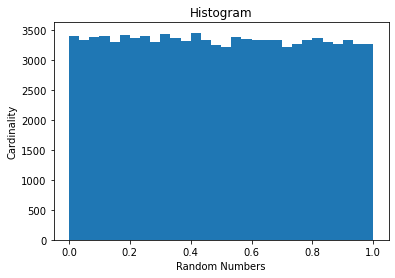

In [4]:
plt.hist(numbers, bins=30, range=[0, 1])
plt.ylabel('Cardinality')
plt.xlabel('Random Numbers')
plt.title('Histogram')
plt.show()
# widzimy w miarę jednostajny rozkład

b)

In [5]:
def normal_pdf(x):
    return 1/sqrt(2*pi) * exp(-1/2 * x**2)

def f(x):
    return (1 + cos(2*pi*x))/(1 + exp(-2*pi**2))

def random_b():
    y = uniform(0, 1)
    x = normal(0, 1)
    while y > f(x)/(2*normal_pdf(x)):
        y = uniform(0, 1)
        x = normal(0, 1)
    return x

In [6]:
for i in range(10):
    print("(Pseudo)random number ", i+1, ": ", random_b(), sep="")

(Pseudo)random number 1: -0.9520972068613222
(Pseudo)random number 2: -0.7454410594826583
(Pseudo)random number 3: 0.32210606833962163
(Pseudo)random number 4: -0.0515177209393851
(Pseudo)random number 5: -1.6193000650367457
(Pseudo)random number 6: -1.1139644169570049
(Pseudo)random number 7: -0.143372474128259
(Pseudo)random number 8: 0.12652592015140082
(Pseudo)random number 9: -1.3014889745468878
(Pseudo)random number 10: 0.7249152254312674


c) Dla przykładu będziemy generowali zmienne z rozkładu Poissona o $\lambda$ równym 2.

In [7]:
# Sposób pierwszy - za pomocą procesu Poissona.
# Patrzymy ile zmiennych losowych z rozkładu Exp(2)
# zsumuje się do czegoś mniejszego od 1, z tym, że
# dodanie kolejnej zmiennej da sumę większą od 1.
# Liczba tych zmiennych da nam wartość zmiennej poissonowskiej z parameterm 2

def poisson1():
    x = exponential(1/2) # chodzi o Exp(2), numpy ma ten rozkład z parametrem 1/lambda
    poisson_val = 0
    while x <= 1:
        poisson_val += 1
        x += exponential(1/2)
    return poisson_val

# Sposób drugi - jak było na laboratorium

def poisson_pmf(k):
    return 2**k * exp(-2) / factorial(k)

def poisson2():
    i = 0
    u = uniform(0, 1)
    sum1 = 0
    sum2 = poisson_pmf(0)
    while not sum1 < u <= sum2:
        i += 1
        sum1 = sum2
        sum2 += poisson_pmf(i)
    return i

In [8]:
def random_c(n, method):
    samples = [0] * n
    for i in range(n):
        samples[i] = method()
    return samples

n = 1000

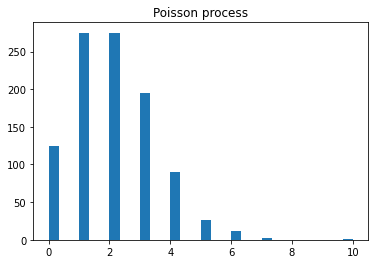

In [9]:
samples = random_c(n, poisson1)
plt.hist(samples, bins=30, range=[0, 10])
plt.title('Poisson process')
plt.show()

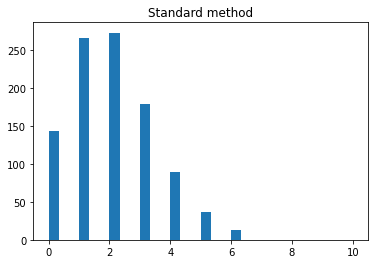

In [10]:
samples = random_c(n, poisson2)
plt.hist(samples, bins=30, range=[0, 10])
plt.title('Standard method')
plt.show()

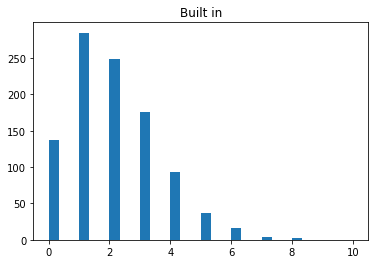

In [11]:
# na potrzebę sprawdzenia poprawności wykorzystamy też wbudowany algorytm
# widzimy, że histogramy są bardzo do siebie podobne
samples = poisson(2, n)
plt.hist(samples, bins=30, range=[0, 10])
plt.title('Built in')
plt.show()

d)

In [12]:
def random_d(n):
    samples = [0] * n
    for i in range(len(samples)):
        u = uniform(0, 1)
        if u < 1/3:
            samples[i] = binomial(10, 1/3)
        elif u < 2/3:
            samples[i] = normal(0, 1)
        else:
            samples[i] = exponential(1)
    return np.array(samples)

In [13]:
def ecdf(n):
    samples = random_d(n)
    t = np.arange(-10, 10, step=20/n)
    probs = [0] * n
    for i in range(len(t)):
        probs[i] = sum(samples <= t[i])/n
    return probs, t

def theoretical(t):
    return 1/3 * expon.cdf(t, 1) + 1/3 * binom.cdf(t, 10, 1/3) + 1/3 * norm.cdf(t, 0, 1)

In [16]:
probs, t = ecdf(800)

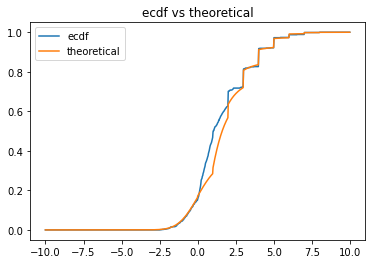

In [17]:
plt.plot(t, probs, label='ecdf')
plt.plot(t, theoretical(t), label='theoretical')
plt.title('ecdf vs theoretical')
plt.legend()
plt.show()

e)